In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 
sys.path.append("../lib/")
from utils import * 

In [2]:
names = ['ID', 'Xcor', 'Ycor', 'F606', 'eF606',
         'F814', 'eF814', 'chi', 'sharp']

catalog = pd.read_csv("../Data/Catalog/hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt", names=names,
                      delim_whitespace=True, skiprows=1)

In [3]:
df_606 = pd.read_csv("../Results/fit_results_F606w_gauss2d.csv")

In [9]:
cols_ord = ['Ai', 'A', 'xi', 'yi', 'delta_x', 'delta_y', 'sigma_x', 'sigma_y', 'sharp']

In [4]:
df_606['delta_x'] = np.abs(df_606['xi'] - df_606['x0'])
df_606['delta_y'] = np.abs(df_606['yi'] - df_606['y0'])
df_606.drop(columns=['x0', 'y0'], inplace=True)
df_606

,ID,Ai,xi,yi,A,sigma_x,sigma_y,theta,r2,delta_x,delta_y
0,45413.0,976.700928,4975.0,1003.0,0.871890,1.701662,1.555486,-0.202010,0.535600,0.078626,0.368820
1,52218.0,1720.054565,3559.0,1067.0,0.989116,1.536470,1.464358,-0.501849,0.966501,0.527661,0.453909
2,57307.0,959.561279,3041.0,1116.0,0.845459,1.632058,1.554331,2.402598,0.361683,0.135856,0.636609
3,59517.0,1763.463379,5266.0,1137.0,0.803271,1.648372,1.525492,-0.181654,0.845659,0.115288,0.075605
4,67202.0,1494.275757,5354.0,1213.0,0.872993,1.577170,1.513458,-0.066725,0.919235,0.296917,0.092089
...,...,...,...,...,...,...,...,...,...,...,...
878,890845.0,971.496460,6865.0,10194.0,0.886282,1.699300,1.865671,0.889786,0.126838,0.025856,0.018931
879,892180.0,1579.990723,5577.0,10216.0,0.730657,2.348847,2.037618,-0.075431,0.956985,0.800398,0.387447
880,893600.0,1085.983887,5869.0,10241.0,0.760044,1.883473,1.578987,5.546246,0.844582,0.104249,0.733461
881,897539.0,1573.232666,7123.0,10322.0,0.910377,1.839167,1.692269,-0.510299,0.069117,0.027942,0.104568


In [6]:
df_606.r2.isna().sum()

13

In [7]:
df_606[(df_606.r2 > 0.90)]

,ID,Ai,xi,yi,A,sigma_x,sigma_y,theta,r2,delta_x,delta_y
1,52218.0,1720.054565,3559.0,1067.0,0.989116,1.536470,1.464358,-0.501849,0.966501,0.527661,0.453909
4,67202.0,1494.275757,5354.0,1213.0,0.872993,1.577170,1.513458,-0.066725,0.919235,0.296917,0.092089
12,95763.0,4824.379395,6656.0,1468.0,0.923279,1.571991,1.536281,-0.045182,0.960362,0.342795,0.208305
17,131475.0,1708.534668,4297.0,1749.0,0.883332,1.533743,1.491052,-0.776555,0.969919,0.262224,0.025517
19,139364.0,1170.704834,5047.0,1819.0,0.952026,1.509263,1.500241,-0.012465,0.969210,0.247071,0.428381
...,...,...,...,...,...,...,...,...,...,...,...
867,868570.0,1211.681885,6977.0,9910.0,0.846548,1.805178,1.714130,-0.211065,0.964575,0.178137,0.390293
868,868616.0,6304.354980,4750.0,9911.0,0.819737,1.736205,1.525632,0.174891,0.934801,0.186062,0.087863
869,869921.0,2313.404541,6398.0,9925.0,0.879309,1.607894,1.554394,-0.370143,0.942030,0.126747,0.263412
874,876309.0,1050.422363,3947.0,9997.0,0.925746,1.544675,1.484740,0.029711,0.975629,0.525360,0.451872


In [6]:
df_bad = pd.read_csv("../Results/bad_stars_ID_F606w.txt")

In [7]:
mask = (df_606.r2 > 0.95) & ~df_606.ID.isin(df_bad.bad_ID) & (df_606.A < 2)

df_606.loc[mask, 'sharp'] = df_606[mask].ID.map(catalog.set_index('ID').sharp)

In [15]:
mask = (df_606.r2 > 0.95) & ~df_606.ID.isin(df_bad.bad_ID) & (df_606.A < 2)

table = df_606[cols_ord][mask].describe()

In [16]:
df_606[mask].sort_values(by='r2')

,ID,Ai,xi,yi,A,sigma_x,sigma_y,theta,r2,delta_x,delta_y,sharp
778,771091.0,3095.448975,4613.0,9027.0,0.904964,1.587470,1.708922,1.231530,0.950090,0.106725,0.520463,-0.0240
410,517134.0,1029.106812,6404.0,6247.0,0.908357,1.551764,1.595528,0.688644,0.950887,0.143384,0.369817,0.0120
266,418955.0,6986.553711,7921.0,5054.0,0.910391,1.536800,1.498606,-0.305297,0.951336,0.172332,0.197372,-0.0060
510,578943.0,1210.519043,1532.0,7014.0,0.859855,1.631724,1.589214,0.320840,0.951426,0.236863,0.165901,0.1630
368,497255.0,1825.854248,4825.0,6001.0,0.883217,1.565109,1.624214,0.761810,0.951854,0.215458,0.237630,0.1930
...,...,...,...,...,...,...,...,...,...,...,...,...
454,540621.0,8037.481934,6872.0,6544.0,0.979211,1.513933,1.483275,-0.690809,0.997328,0.268266,0.518298,-0.0430
771,762744.0,2105.108398,7952.0,8950.0,0.897844,1.563177,1.614936,0.854367,0.997756,0.017831,0.161430,0.0050
791,782970.0,2163.717529,4850.0,9127.0,0.870867,1.635608,1.542617,-0.317711,0.997846,0.144727,0.273239,-0.0780
318,458309.0,1453.233154,5731.0,5518.0,0.923373,1.559273,1.593108,0.465862,0.998680,0.029796,0.370766,0.1500


In [11]:
table

,Ai,A,xi,yi,delta_x,delta_y,sigma_x,sigma_y,sharp
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2177.665144,0.899487,5778.126316,6230.042105,0.280693,0.263244,1.635103,1.589150,0.032382
std,1535.531178,0.053742,2078.651080,2071.314218,0.177050,0.143847,0.233225,0.205202,0.206257
min,951.550293,0.686737,998.000000,1067.000000,0.007973,0.008348,1.466328,1.447639,-0.199000
25%,1151.765045,0.874815,4232.250000,4928.000000,0.143821,0.153451,1.543605,1.509356,-0.039625
50%,1616.473511,0.901185,5800.000000,6319.000000,0.274046,0.259874,1.585095,1.548863,0.000500
75%,2513.521240,0.934242,7503.750000,7711.750000,0.364231,0.380370,1.644606,1.606692,0.060750
max,8232.429688,1.019225,9977.000000,10216.000000,1.309855,0.625488,3.714364,3.933923,2.552000


In [18]:
latex_table_generator(table, 
                      "../Results/Gauss_2D_describe.tex",
                      "%.2f", index=True)

<AxesSubplot:>

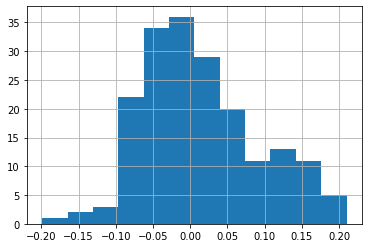

In [23]:
df_606[mask & (df_606.sharp > 0.25)]

<AxesSubplot:>

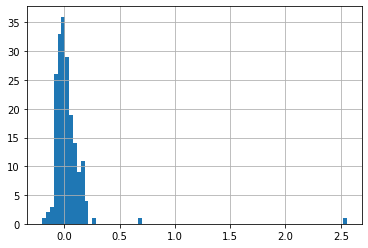

In [20]:
df_606[mask]['sharp'].hist(bins='auto')

In [32]:
df_606[df_606.ID.isin(df_bad.bad_ID)]

,ID,Ai,xi,yi,A,sigma_x,sigma_y,theta,r2,delta_x,delta_y
402,514206.0,1496.431030,5408.0,6211.0,0.188636,12.814910,11.006563,-1.312521,0.999290,4.639566,1.386259
516,582257.0,1094.006836,10094.0,7055.0,0.245261,8.124458,6.487414,-0.716297,0.726214,0.133678,1.067577
872,874860.0,1071.469849,5878.0,9979.0,0.624904,4.488199,1.671051,-0.435957,0.144069,1.957217,1.106638


In [5]:
df = pd.read_csv("../Results/ID_coords_image_F606w.csv")

In [24]:
mask1 = (df_606.r2_x > 0.95) & (df_606.r2_y > 0.95)
mask2 = np.abs((df_606.max_int_x - df_606.max_int_y)) < 1000
# Eliminiamo le poche stelle che si trovano sopra a 10'000 in quanto contengono artefatti o 
# più stelle sovrapposte
mask3 = (df_606.max_int_x < 10000) | (df_606.max_int_y < 10000)

mask = mask1 & mask2 & mask3

df_606[mask]#.ID.isin(bad_stars.bad_ID)

AttributeError: 'DataFrame' object has no attribute 'r2_x'

In [9]:
df[mask]

In [13]:
df_606[mask].sort_values('max_int_x').iloc[50:70]

,ID,max_int_x,max_int_y,var_x,var_y,r2_x,r2_y,std_x,std_y
201,299261.0,941.230959,966.249198,1.903446,1.907484,0.991654,0.989657,4.138963,4.143351
300,358989.0,941.294658,992.742310,2.167204,1.910103,0.989811,0.994185,4.416428,4.146195
773,599806.0,941.406300,944.408484,2.055910,1.920217,0.987354,0.987176,4.301534,4.157156
700,567226.0,941.531140,992.758070,2.072649,1.967045,0.992595,0.994256,4.319009,4.207541
869,643483.0,943.120544,927.950101,2.396342,2.594113,0.973220,0.953487,4.644037,4.831875
215,309143.0,944.296488,997.440226,1.960326,1.880627,0.992609,0.990868,4.200350,4.114079
432,430676.0,944.873448,971.593188,1.978738,1.891120,0.993341,0.991446,4.220029,4.125540
145,242982.0,944.939441,994.628017,2.038674,1.919934,0.991193,0.992283,4.283465,4.156851
1028,751753.0,945.804857,933.104264,2.038810,1.886926,0.984888,0.984228,4.283607,4.120963
688,560159.0,946.661353,920.042287,1.993111,1.991219,0.991873,0.988911,4.235328,4.233317


(array([226., 126.,  76.,  72.,  68.,  41.,  30.,  29.,  17.,  14.,  13.,
         10.,  12.,  15.,  12.,  10.,  11.,   7.,   9.,   4.,   9.,   4.,
          7.,   4.,   4.,   2.,   2.,   0.,   1.,   3.,   0.,   0.,   2.]),
 array([ 877.88852815, 1127.75039581, 1377.61226348, 1627.47413114,
        1877.3359988 , 2127.19786646, 2377.05973412, 2626.92160179,
        2876.78346945, 3126.64533711, 3376.50720477, 3626.36907243,
        3876.2309401 , 4126.09280776, 4375.95467542, 4625.81654308,
        4875.67841074, 5125.54027841, 5375.40214607, 5625.26401373,
        5875.12588139, 6124.98774905, 6374.84961672, 6624.71148438,
        6874.57335204, 7124.4352197 , 7374.29708736, 7624.15895503,
        7874.02082269, 8123.88269035, 8373.74455801, 8623.60642567,
        8873.46829334, 9123.330161  ]),
 <BarContainer object of 33 artists>)

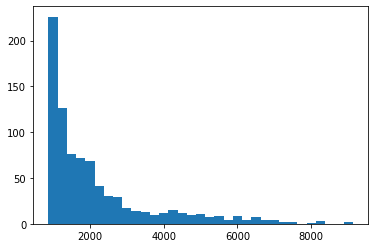

In [10]:
plt.hist(df_606[mask].max_int_x, bins=33)

In [11]:
df_606[mask].describe()

,ID,max_int_x,max_int_y,var_x,var_y,r2_x,r2_y,std_x,std_y
count,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,6.227625e+05,2161.324819,2162.421808,2.110944,2.024491,0.988140,0.986492,4.348131,4.258506
std,6.943477e+05,1526.110791,1531.919598,0.394993,0.400013,0.007750,0.008015,0.303919,0.292652
min,4.541300e+04,877.888528,832.100953,1.516099,1.525213,0.952412,0.950128,3.693899,3.704986
25%,3.798105e+05,1106.112978,1101.454043,1.973558,1.906771,0.986501,0.984835,4.214502,4.142576
50%,5.357235e+05,1599.845752,1585.499857,2.059955,1.986566,0.990776,0.989474,4.305763,4.228368
75%,6.883630e+05,2529.784559,2589.081514,2.173559,2.079879,0.992947,0.991446,4.422899,4.326535
max,5.002476e+06,9123.330161,8979.567938,10.522372,11.373163,0.996578,0.996507,9.731462,10.117236


In [10]:
from statsmodels.tsa.stattools import kpss

In [6]:
df_606.columns

Index(['ID', 'max_int_x', 'max_int_y', 'var_x', 'var_y'], dtype='object')

In [7]:
y = np.sqrt(df_606.var_y).to_numpy()
mask = np.logical_not(np.isnan(y))
y = y[mask]

kpssTest = kpss(y[y<30000], nlags=1)
pValue = kpssTest[1]
if (pValue > 0.05):
    isStationary = 'Yes'
else:
    isStationary = 'No'

isStationary

c:\Users\cosmi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


'No'

In [8]:
df_606.describe()

,ID,max_int_x,max_int_y,var_x,var_y
count,1.182000e+03,1.179000e+03,1.179000e+03,1179.000000,1179.000000
mean,6.469130e+05,2.557193e+03,2.525371e+03,2.061564,4.465667
std,8.086825e+05,3.258393e+03,2.888340e+03,4.018332,68.688488
min,7.873000e+03,-6.310768e-13,-4.887977e-13,0.000177,0.000037
25%,3.582870e+05,1.071851e+03,1.080434e+03,1.925908,1.851701
50%,5.233915e+05,1.619532e+03,1.611873e+03,2.036390,1.967119
75%,6.799302e+05,2.750586e+03,2.859946e+03,2.173940,2.081441
max,5.002476e+06,3.280440e+04,3.056151e+04,136.332456,2276.020677
